In [1]:
import cosima_cookbook as cc
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cmocean as cm
from scipy.optimize import curve_fit
from xhistogram.xarray import histogram

from dask.distributed import Client

%matplotlib inline

In [2]:
client = Client(n_workers=4)
display(client)

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 4
Total threads: 8,Total memory: 80.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:45873,Workers: 4
Dashboard: /proxy/8787/status,Total threads: 8
Started: Just now,Total memory: 80.00 GiB
Comm: tcp://127.0.0.1:44509,Total threads: 2
Dashboard: /proxy/42661/status,Memory: 20.00 GiB
Nanny: tcp://127.0.0.1:34981,


In [3]:
### Generate new database

db = '/scratch/e14/mp2135/access-om2/archive/databases/1deg_jra55_ryf_experiments_abrupt_spinup500.db'
session = cc.database.create_session(db)

In [4]:
cont025 = xr.open_mfdataset(paths='/scratch/e14/mp2135/access-om2/archive/025deg_jra55_ryf_cont/output*/ocean/ocean_scalar.nc', 
                            combine='by_coords').temp_global_ave[:-1].groupby('time.year').mean(dim='time')
cool025 = xr.open_mfdataset(paths='/scratch/e14/mp2135/access-om2/archive/025deg_jra55_ryf_cool_x1/output*/ocean/ocean_scalar.nc', 
                            combine='by_coords').temp_global_ave[:-1].groupby('time.year').mean(dim='time')
warm025 = xr.open_mfdataset(paths='/scratch/e14/mp2135/access-om2/archive/025deg_jra55_ryf_warm_x1/output*/ocean/ocean_scalar.nc', 
                            combine='by_coords').temp_global_ave[:-1].groupby('time.year').mean(dim='time')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/xarray/core/indexing.py:422: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/xarray/core/indexing.py:422: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/xarray/core/indexing.py:422: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/g/data/hh5/public/apps/mini

In [5]:
cont1 = xr.concat([xr.open_dataset('/scratch/e14/mp2135/access-om2/archive/1deg_jra55_ryf_cont/output099/ocean/ocean-scalar-1-daily-ym_2399_01.nc').temp_global_ave[:-1].groupby('time.year').mean(dim='time'),
                  xr.open_mfdataset(paths='/scratch/e14/mp2135/access-om2/archive/1deg_jra55_ryf_cont/output10*/ocean/ocean-scalar*.nc', 
                          combine='by_coords').temp_global_ave[:-1].groupby('time.year').mean(dim='time').sel(year=slice(2400,2409))], 'year')

cool1 = xr.open_mfdataset(paths='/scratch/e14/mp2135/access-om2/archive/1deg_jra55_ryf_cool_x1/output*/ocean/ocean-scalar*.nc', 
                          combine='by_coords').temp_global_ave[:-1].groupby('time.year').mean(dim='time').sel(year=slice(2399,2409))

warm1 = xr.open_mfdataset(paths=f'/scratch/e14/mp2135/access-om2/archive/1deg_jra55_ryf_warm_x1/output*/ocean/ocean-scalar*.nc', 
                          combine='by_coords').temp_global_ave[:-1].groupby('time.year').mean(dim='time').sel(year=slice(2399,2409))

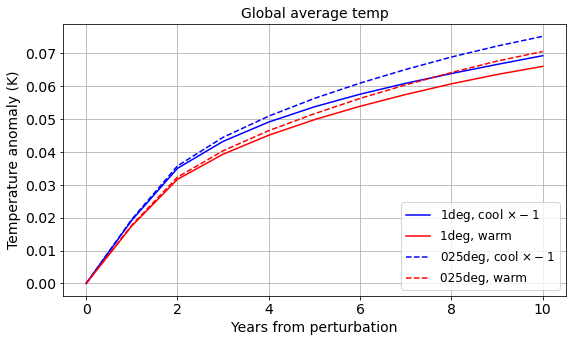

In [14]:
plt.figure(figsize=(9,5))
fontsize=14
plt.plot((cont1 - cool1), color='b', label=r'1deg, cool $\times -1$')
plt.plot((warm1 - cont1), color='r', label=r'1deg, warm')
plt.plot((cont025 - cool025)[1:], color='b', label=r'025deg, cool $\times -1$', linestyle='--')
plt.plot((warm025 - cont025)[1:], color='r', label=r'025deg, warm', linestyle='--')
plt.title('Global average temp',fontsize=fontsize)
plt.ylabel('Temperature anomaly (K)',fontsize=fontsize)
plt.xlabel('Years from perturbation',fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.grid()
plt.legend(fontsize=fontsize-2,loc='lower right')
# plt.savefig('025v1.pdf', bbox_inches='tight', dpi=200)

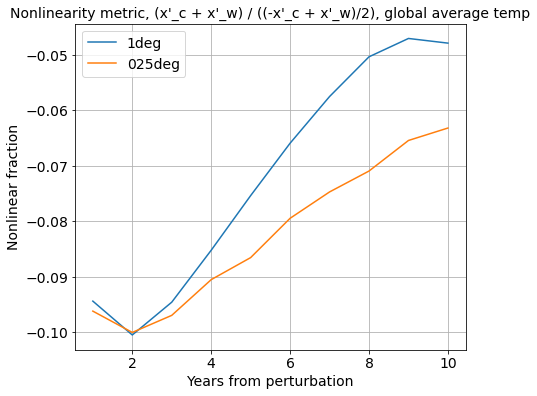

In [5]:
# plt.figure(figsize=(7,6))
# plt.plot((((warm1 - cont1) + (cool1 - cont1)))/(((warm1 - cont1) - (cool1 - cont1))/2), 
#          color='C0',label=r'1deg')
# plt.plot((((warm025 - cont025)[1:] + (cool025 - cont025)[1:]))/(((warm025 - cont025)[1:] - (cool025 - cont025)[1:])/2),
#          color='C1',label=r'025deg')
# fontsize=14
# plt.title(r"Nonlinearity metric, (x'_c + x'_w) / ((-x'_c + x'_w)/2), global average temp",fontsize=fontsize)
# plt.legend(fontsize=fontsize)
# plt.xlabel('Years from perturbation',fontsize=fontsize)
# plt.ylabel('Nonlinear fraction',fontsize=fontsize)
# plt.yticks(fontsize=fontsize)
# plt.xticks(fontsize=fontsize)
# plt.grid()
# # plt.savefig('025v1_nonlinearity.pdf', bbox_inches='tight', dpi=200)

In [3]:
# # 025 spin-up global ave temp

# spinup025 = xr.open_mfdataset(paths='/g/data/ik11/outputs/access-om2-025/025deg_jra55_ryf9091_gadi/output*/ocean/ocean_scalar.nc', 
#                             combine='by_coords').temp_global_ave[:-1].groupby('time.year').mean(dim='time')

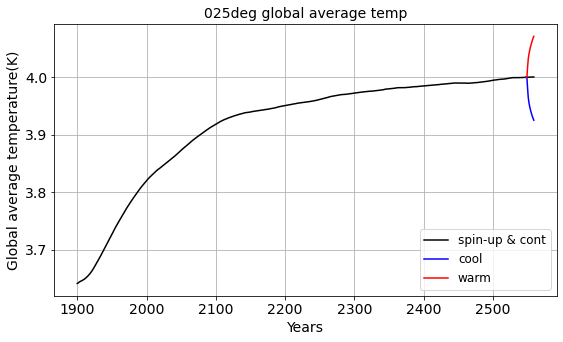

In [5]:
# plt.figure(figsize=(9,5))
# fontsize=14

# spinup025.plot(color='k', label='spin-up & cont')
# cont025.plot(color='k')
# cool025.plot(color='b', label='cool')
# warm025.plot(color='r', label='warm')
# plt.title('025deg global average temp',fontsize=fontsize)
# plt.ylabel('Global average temperature(K)',fontsize=fontsize)
# plt.xlabel('Years',fontsize=fontsize)
# plt.xticks(fontsize=fontsize)
# plt.yticks(fontsize=fontsize)
# plt.grid()
# plt.legend(fontsize=fontsize-2,loc='lower right')
# # plt.savefig('025_spinup.pdf', bbox_inches='tight', dpi=200)

In [15]:
cont025_sst = xr.open_mfdataset(paths='/scratch/e14/mp2135/access-om2/archive/025deg_jra55_ryf_cont/output*/ocean/ocean_scalar.nc', 
                            combine='by_coords').temp_surface_ave[:-1].groupby('time.year').mean(dim='time')
cool025_sst = xr.open_mfdataset(paths='/scratch/e14/mp2135/access-om2/archive/025deg_jra55_ryf_cool_x1/output*/ocean/ocean_scalar.nc', 
                            combine='by_coords').temp_surface_ave[:-1].groupby('time.year').mean(dim='time')
warm025_sst = xr.open_mfdataset(paths='/scratch/e14/mp2135/access-om2/archive/025deg_jra55_ryf_warm_x1/output*/ocean/ocean_scalar.nc', 
                            combine='by_coords').temp_surface_ave[:-1].groupby('time.year').mean(dim='time')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/xarray/core/indexing.py:422: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/xarray/core/indexing.py:422: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/xarray/core/indexing.py:422: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/g/data/hh5/public/apps/mini

In [16]:
cont1_sst = xr.concat([xr.open_dataset('/scratch/e14/mp2135/access-om2/archive/1deg_jra55_ryf_cont/output099/ocean/ocean-scalar-1-daily-ym_2399_01.nc').temp_global_ave[:-1].groupby('time.year').mean(dim='time'),
                  xr.open_mfdataset(paths='/scratch/e14/mp2135/access-om2/archive/1deg_jra55_ryf_cont/output10*/ocean/ocean-scalar*.nc', 
                          combine='by_coords').temp_surface_ave[:-1].groupby('time.year').mean(dim='time').sel(year=slice(2400,2409))], 'year')

cool1_sst = xr.open_mfdataset(paths='/scratch/e14/mp2135/access-om2/archive/1deg_jra55_ryf_cool_x1/output*/ocean/ocean-scalar*.nc', 
                          combine='by_coords').temp_surface_ave[:-1].groupby('time.year').mean(dim='time').sel(year=slice(2399,2409))

warm1_sst = xr.open_mfdataset(paths=f'/scratch/e14/mp2135/access-om2/archive/1deg_jra55_ryf_warm_x1/output*/ocean/ocean-scalar*.nc', 
                          combine='by_coords').temp_surface_ave[:-1].groupby('time.year').mean(dim='time').sel(year=slice(2399,2409))

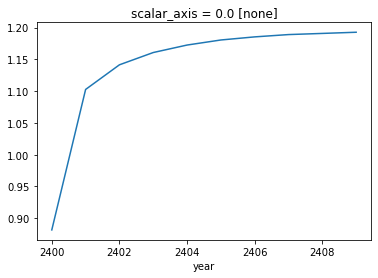

In [21]:
(cont1_sst-cool1_sst)[1:].plot()

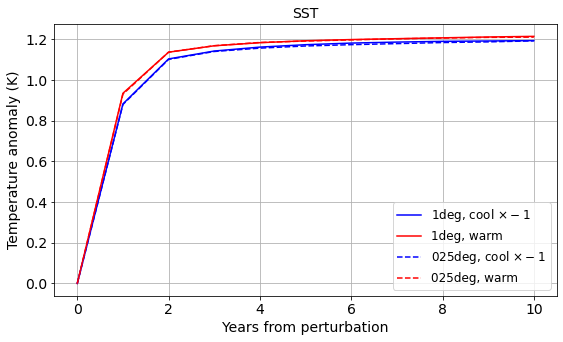

In [25]:
plt.figure(figsize=(9,5))
fontsize=14
plt.plot(np.append(0,(cont1_sst - cool1_sst)[1:]), color='b', label=r'1deg, cool $\times -1$')
plt.plot(np.append(0,(warm1_sst - cont1_sst)[1:]), color='r', label=r'1deg, warm')
plt.plot((cont025_sst - cool025_sst)[1:], color='b', label=r'025deg, cool $\times -1$', linestyle='--')
plt.plot((warm025_sst - cont025_sst)[1:], color='r', label=r'025deg, warm', linestyle='--')
plt.title('SST',fontsize=fontsize)
plt.ylabel('Temperature anomaly (K)',fontsize=fontsize)
plt.xlabel('Years from perturbation',fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.grid()
plt.legend(fontsize=fontsize-2,loc='lower right')
# plt.savefig('025v1_sst.pdf', bbox_inches='tight', dpi=200)

In [7]:
# AMOC

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/xarray/coding/times.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/xarray/coding/times.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/xarray/coding/times.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datet

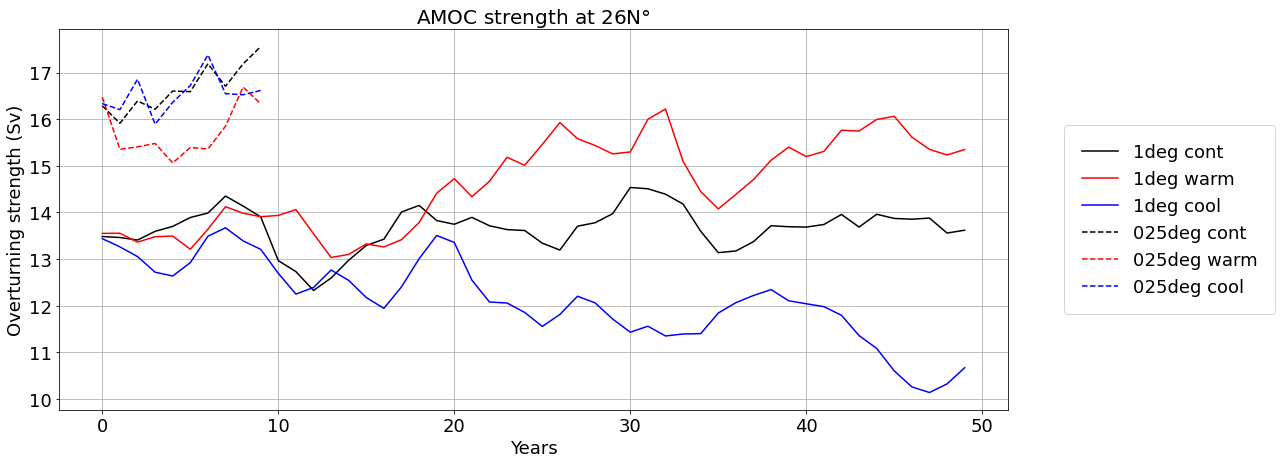

In [13]:
from collections import OrderedDict

exptdict = OrderedDict([
    ('1deg cont',  {'expt': '1deg_jra55_ryf_cont'}),
    ('1deg warm',  {'expt': '1deg_jra55_ryf_warm_x1'}),
    ('1deg cool',  {'expt': '1deg_jra55_ryf_cool_x1'}),
    ('025deg cont',  {'expt': '025deg_jra55_ryf_cont'}),
    ('025deg warm',  {'expt': '025deg_jra55_ryf_warm_x1'}),
    ('025deg cool',  {'expt': '025deg_jra55_ryf_cool_x1'})
])

keys = ['1deg cont', '1deg warm', '1deg cool', '025deg cont', '025deg warm', '025deg cool']
colors = {'1deg cont': 'k','1deg warm': 'r','1deg cool':'b','025deg cont': 'k','025deg warm': 'r','025deg cool':'b'}
linestyles = {'1deg cont': '-','1deg warm': '-','1deg cool':'-','025deg cont': '--','025deg warm': '--','025deg cool':'--'}

yr_beg_1deg = '2400-01-01'
yr_beg_025deg = '2550-01-01'

amocs = []

plt.figure(figsize=(17, 7))

for ekey in exptdict:
    expt = exptdict[ekey]['expt']
    
    if expt[0] == '1':
    
        var = xr.open_mfdataset(paths=f'/scratch/e14/mp2135/access-om2/archive/{expt}/output1*/ocean/ocean-3d-ty_trans_rho-1-monthly-mean-ym*', combine='by_coords').ty_trans_rho.sel(time=slice(yr_beg_1deg, '2449-12-31'))
        psi_amoc = var.sel(grid_xt_ocean = slice(- 103, - 5)).sum('grid_xt_ocean').sel(method = 'Nearest', grid_yu_ocean = 26) * 1.0e-9
        psi_amoc_sum = psi_amoc.cumsum('potrho') - psi_amoc.sum('potrho')

        try:
            var2 = xr.open_mfdataset(paths=f'/scratch/e14/mp2135/access-om2/archive/{expt}/output1*/ocean/ocean-3d-ty_trans_rho_gm-1-monthly-mean-ym*', combine='by_coords').ty_trans_rho_gm.sel(time=slice(yr_beg_1deg, None))
            psi_amoc_gm = var2.sel(grid_xt_ocean = slice( - 103, - 5)).sum('grid_xt_ocean').sel(method = 'Nearest', grid_yu_ocean = 26) * 1.0e-9
            psi_amoc_sum = psi_amoc_sum + psi_amoc_gm
        except:
            print('GM term not found')
    
    else:
        
        var = cc.querying.getvar(expt, 'ty_trans_rho', session, start_time = yr_beg_025deg)
        psi_amoc = var.sel(grid_xt_ocean = slice(- 103, - 5)).sum('grid_xt_ocean').sel(method = 'Nearest', grid_yu_ocean = 26) * 1.0e-9
        psi_amoc_sum = psi_amoc.cumsum('potrho') - psi_amoc.sum('potrho')
        
        # try:
        #     var2 = cc.querying.getvar(expt, 'ty_trans_rho_gm', session, start_time = yr_beg_025deg)
        #     psi_amoc_gm = var2.sel(grid_xt_ocean = slice( - 103, - 5)).sum('grid_xt_ocean').sel(method = 'Nearest', grid_yu_ocean = 26) * 1.0e-9
        #     psi_amoc_sum = psi_amoc_sum + psi_amoc_gm
        # except:
        #     print('GM term not found')                    
        
    psi_amoc_sum = psi_amoc_sum.sel(potrho = slice(1035.5, None)).max('potrho').resample(time = 'Y').mean().dropna('time')#.load()
    
    # amocs.append(psi_amoc_sum)
    
    # psi_amoc_sum.plot(label = ekey, color = colors[ekey], linestyle = linestyles[ekey])
    
    plt.plot(psi_amoc_sum, label=ekey, color = colors[ekey], linestyle = linestyles[ekey])
        
fontsize=18
xlims = plt.xlim()
plt.xlabel('Years', fontsize=fontsize)
plt.ylabel('Overturning strength (Sv)', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fancybox=True, borderpad=1,bbox_to_anchor=(1.05, 0.5),loc = 'center left', fontsize=fontsize)
plt.title('AMOC strength at 26N$\degree$', fontsize=fontsize+2)
plt.grid()
plt.savefig('025v1_amoc.pdf', bbox_inches='tight', dpi=300)